# Proyek Analisis Data: Nama dataset
- Nama: MHD Anwar
- Email: mhdanware1@gmail.com
- Id Dicoding: MHD. ANWAR

## Menentukan Pertanyaan Bisnis

- Bagaimana Trend Review Produk? Kategori produk apa yang paling banyak mendapatkan review baik dan kurang baik dari pembeli?
- Bagaimana Trend Produk yang laris dan kurang laris di E-commerce?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [4]:
# User Dataset
sellers = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/sellers_dataset.csv")
customers = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/customers_dataset.csv")
# geolocation = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/geolocation_dataset.csv")

# Order Dataset
order_items = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/order_items_dataset.csv")
order_payments = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/order_payments_dataset.csv")
order_reviews = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/order_reviews_dataset.csv")
orders = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/orders_dataset.csv")

# Product Dataset
product_category = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/product_category_name_translation.csv")
products = pd.read_csv("/content/drive/MyDrive/E-commerce-public-dataset/products_dataset.csv")

### Assessing Data

####1. Data Sellers

In [5]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Data Seller tidak ada jumlah yang salah dan type data yang salah

In [6]:
print("Duplikasi Data: ",sellers.duplicated().sum())

Duplikasi Data:  0


Tidak ada data seller yang terduplikasi

In [7]:
sellers.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


Tidak ada data seller yang kosong / *missing value*

In [8]:
sellers.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


Tidak terdapat keanenahan berdasarkan statistik deskriptif dalam data seller

####2. Data Customer

In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Data Customer tidak ada jumlah yang salah dan type data yang salah

In [10]:
print("Duplikasi Data : ", customers.duplicated().sum())

Duplikasi Data :  0


Tidak ada data customer yang terduplikasi

In [11]:
customers.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


Tidak ada data customer yang kosong / *missing value*

In [12]:
customers.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Data Customer tidak ada jumlah data yang salah dan type data yang salah

####4. Data Order Item

In [15]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Terdapat kesalahan tipe data pada kolom **shipping_limit_date** yang seharusnya direpresentasikan dengan tipe data **datetime** bukan object pada data order item

In [16]:
print("Duplikasi Data : ", order_items.duplicated().sum())

Duplikasi Data :  0


Tidak ada data order item yang terduplikasi

In [17]:
order_items.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


Tidak ada data order item yang kosong atau *missing value*

In [18]:
order_items.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


Data Order Item tidak ada jumlah yang salah dan type data yang salah

####5. Data Order Payments

In [19]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Data Order Payments tidak ada jumlah yang salah dan type data yang salah

In [20]:
print("Duplikasi Data : ", order_payments.duplicated().sum())

Duplikasi Data :  0


Tidak terjadi duplikasi data pada data order payment

In [21]:
order_payments.isna().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


Tidak ada data yang kosong atau *missing value* pada data order payments

In [22]:
order_payments.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


Data Order Payments tidak ada jumlah yang salah dan type data yang salah

####6. Order Reviews

In [23]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Terdapat kesalahan tipe data pada kolom **review_creation_date** dan **review_answer_timestamp** yang seharusnya direpresentasikan dengan tipe data **datetime** bukan object pada data order review



In [24]:
print("Duplikasi Data : ", order_reviews.duplicated().sum())

Duplikasi Data :  0


Tidak ada duplikasi data pada data order review

In [25]:
order_reviews.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


Terdapat *missing value* pada kolom **review_comment_title** sebanyak **87.656** dan **review_comment**_message sebanyak **58.247**

In [26]:
order_reviews.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,4548534449b1f572e357211b90724f1b,03c939fd7fd3b38f8485a0f95798f1f6,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


Data Order Review tidak ada jumlah yang salah dan type data yang salah

####7. Data Orders

In [27]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Terdapat kesalahan tipe data pada kolom **order_purchase_timestamp** , **order_delivered_carrier_date**, **order_delivered_customer_date** dan  **order_estimated_delivery_date** yang seharusnya direpresentasikan dengan tipe data **datetime** bukan object pada data order

In [28]:
print("Duplikasi Data : ", orders.duplicated().sum())

Duplikasi Data :  0


Tidak ada duplikasi data pada data order

In [29]:
orders.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Terdapat *missing value* pada kolom **order_approved_at** sebanyak **160**, **order_delivered_carrier_date** sebanyak **1783** dan
**order_delivered_customer_date** sebanyak **2965**.

In [30]:
orders.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Data Order tidak ada jumlah yang salah dan type data yang salah

####8. Data Product Category

In [ ]:
product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Data Product Category tidak ada jumlah yang salah dan type data yang salah

In [ ]:
print("Duplikasi Data : ", product_category.duplicated().sum())

Duplikasi Data :  0


Tidak ada duplikasi data pada data product category

In [ ]:
product_category.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

Tidak ada data product category yang kosong atau *missing value*

In [ ]:
product_category.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Data Product Category tidak ada jumlah yang salah dan type data yang salah

####9. Data Products

In [31]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Data Products tidak ada jumlah yang salah dan type data yang salah

In [32]:
print("Duplikasi Data : ", products.duplicated().sum())

Duplikasi Data :  0


Tidak ada duplikasi data pada data products

In [33]:
products.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


Terdapat missing value pada kolom **product_category_name**   sebanyak      **610**
**product_name_lenght**    sebanyak       **610**,
**product_description_lenght**  sebanyak  **610**,
**product_photos_qty**    sebanyak       **610**,
**product_weight_g**       sebanaak         **2**,
**product_length_cm**     sebanyak          **2**,
**product_height_cm**      sebanyak         **2** dan
**product_width_cm**         sebanyak       **2**

In [34]:
products.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


Tidak terdapat keanenahan berdasarkan statistik deskriptif dalam data products

### Cleaning Data

####1. Mengubah Tipe Data
Mengubah tipe data **datetime** untuk dataset **order_items**, **order_reviews** dan **orders**

In [35]:
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

In [36]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [37]:
order_items.to_csv('order_items.csv', index=False)

Tipe data untuk **shipping_limit_date** sudah berubah ke **datetime**

In [38]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
  order_reviews[column] = pd.to_datetime(order_reviews[column])

In [ ]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Tipe data untuk **review_creation_date** dan **review_answer_timestamp** sudah berubah ke **datetime**

In [39]:
datetime_columns = ["order_purchase_timestamp" , "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders[column] = pd.to_datetime(orders[column])

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(4)
memory usage: 6.1+ MB


Tipe data untuk **order_purchase_timestamp**,  **order_delivered_carrier_date**   , **order_delivered_customer_date**  dan  **order_estimated_delivery_date**

sudah berubah ke **datetime**

####2. Mengatasi *Missing Value*
Mengatasi data yang kosong atau missing value pada dataset **order_reviews**, **orders** dan **products**.

In [40]:
# Mengisi kolom yang kosong dengan sebuah pesan
order_reviews['review_comment_title'].fillna(value="No Title", inplace=True)
order_reviews['review_comment_message'].fillna(value="No Comment", inplace=True)

<ipython-input-40-7b5b65258491>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews['review_comment_title'].fillna(value="No Title", inplace=True)
<ipython-input-40-7b5b65258491>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [41]:
order_reviews.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


Tidak ada lagi data yang kosong atau *missing value* pada data order reviews

In [42]:
# Filter kolom yang kosong pada data orders
column = orders[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].isna().any(axis=1)

# Tambah 10 menit ke order_purchase_timestamp yang tidak kosong
orders.loc[column, ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']] = (
    pd.to_datetime(orders.loc[column, 'order_purchase_timestamp']) + pd.to_timedelta('10 minutes')
)

In [43]:
orders.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


Tidak ada lagi data yang kosong atau *missing value* pada data orders

In [44]:
# Menghapus data produk yang kosong atau missing
products.dropna(inplace=True)

In [45]:
products.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


Tidak ada lagi data products yang kosong atau *missing value*

## Exploratory Data Analysis (EDA)

### Explore ...

####1. Mempersiapkan data untuk melihat kategori produk yang memiliki review baik dan kurang baik
Menggabungkan data **order_reviews**, **order_items** dan **products**

In [46]:
order_reviews_df = pd.merge(
    left=order_reviews,
    right=order_items,
    how="outer",
    left_on="order_id",
    right_on="order_id"
)
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,97ca439bc427b48bc1cd7177abe71365,00010242fe8c5a6d1ba2dd792cb16214,5.0,No Title,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,7b07bacd811c4117b742569b04ce3580,00018f77f2f0320c557190d7a144bdd3,4.0,No Title,No Comment,2017-05-13,2017-05-15 11:34:13,1.0,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,0c5b33dea94867d1ac402749e5438e8b,000229ec398224ef6ca0657da4fc703e,5.0,No Title,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31,1.0,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,f4028d019cb58564807486a6aaf33817,00024acbcdf0a6daa1e931b038114c75,4.0,No Title,No Comment,2018-08-15,2018-08-15 16:39:01,1.0,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,940144190dcba6351888cafa43f3a3a5,00042b26cf59d7ce69dfabb4e55b4fd9,5.0,No Title,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59,1.0,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [47]:
order_reviews_df = pd.merge(
    left=order_reviews_df,
    right=products,
    how="outer",
    left_on="product_id",
    right_on="product_id"
)
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,91845d1f2ee1fdb677c769fad86f2109,f30149f4a8882a08895b6a242aa0d612,5.0,No Title,No Comment,2018-06-07,2018-06-08 10:59:20,1.0,00066f42aeeb9f3007548bb9d3f33c38,5670f4db5b62c43d542e1b2d56b0cf7c,...,101.65,18.59,perfumaria,53.0,596.0,6.0,300.0,20.0,16.0,16.0
1,e5636189f943b2589b37f715a3bcae96,f5eda0ded77c1293b04c953138c8331d,4.0,No Title,No Comment,2017-12-24,2017-12-27 13:23:27,1.0,00088930e925c41fd95ebfe695fd2655,7142540dd4c91e2237acb7e911c4eba2,...,129.90,13.93,automotivo,56.0,752.0,4.0,1225.0,55.0,10.0,26.0
2,32247878e34bd6e8d7dbf7b31a4ae0b0,0bf736fd0fd5169d60de3699fcbcf986,1.0,No Title,Meu produto não foi entregue até o momento!,2018-01-07,2018-01-11 11:03:53,1.0,0009406fd7479715e4bef61dd91f2462,4a3ca9315b744ce9f8e9374361493884,...,229.00,13.10,cama_mesa_banho,50.0,266.0,2.0,300.0,45.0,15.0,35.0
3,40f2e7bbfda859ba75411743546849b0,3aba44d8e554ab4bb8c09f6f78032ca8,5.0,No Title,"Produto igual ao anunciado, de excelente quali...",2018-08-18,2018-08-22 12:40:29,1.0,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,...,58.90,19.60,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0
4,14303ce09673466b69c4354628aa5a84,6f0dfb5b5398b271cc6bbd9ee263530e,5.0,Produto bom,"Produto bom, mas o pegador da tampa é de plást...",2018-08-08,2018-08-08 23:48:48,1.0,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,...,58.90,19.60,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0


In [48]:
# Filter baris dengan rating 5 dan 1
best_review = order_reviews_df[order_reviews_df['review_score'] == 5]
worst_review = order_reviews_df[order_reviews_df['review_score'] == 1]

# Kemudian, kelompokkan produk yang memiliki rating 5 dan 1 berdasarkan 'product_id'
best_review = best_review.groupby(['review_score', 'product_category_name']).size().reset_index(name='count')
worst_review = worst_review.groupby(['review_score', 'product_category_name']).size().reset_index(name='count')

# Urutkan dari yang terbanyak
best_review_sorted = best_review.sort_values(by='count', ascending=False).head(5)
worst_review_sorted = worst_review.sort_values(by='count', ascending=False).head(5)

best_review = pd.merge(best_review_sorted, product_category, on='product_category_name', how='inner')
worst_review = pd.merge(worst_review_sorted, product_category, on='product_category_name', how='inner')
best_review

,review_score,product_category_name,count,product_category_name_english
0,5.0,beleza_saude,5858,health_beauty
1,5.0,cama_mesa_banho,5785,bed_bath_table
2,5.0,esporte_lazer,5121,sports_leisure
3,5.0,moveis_decoracao,4452,furniture_decor
4,5.0,informatica_acessorios,4200,computers_accessories


In [49]:
worst_review

,review_score,product_category_name,count,product_category_name_english
0,1.0,cama_mesa_banho,1614,bed_bath_table
1,1.0,moveis_decoracao,1260,furniture_decor
2,1.0,informatica_acessorios,1174,computers_accessories
3,1.0,beleza_saude,1081,health_beauty
4,1.0,esporte_lazer,1028,sports_leisure


####2. Mempersiapkan data untuk melihat produk yang paling laris dan kurang laris
Menggabungkan data **order_items** dan **products**

In [50]:
order_tren_df = pd.merge(
    left=order_items,
    right=products,
    how="outer",
    left_on="product_id",
    right_on="product_id"
)
order_tren_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,f30149f4a8882a08895b6a242aa0d612,1,00066f42aeeb9f3007548bb9d3f33c38,5670f4db5b62c43d542e1b2d56b0cf7c,2018-05-24 18:58:59,101.65,18.59,perfumaria,53.0,596.0,6.0,300.0,20.0,16.0,16.0
1,f5eda0ded77c1293b04c953138c8331d,1,00088930e925c41fd95ebfe695fd2655,7142540dd4c91e2237acb7e911c4eba2,2017-12-18 19:32:19,129.90,13.93,automotivo,56.0,752.0,4.0,1225.0,55.0,10.0,26.0
2,0bf736fd0fd5169d60de3699fcbcf986,1,0009406fd7479715e4bef61dd91f2462,4a3ca9315b744ce9f8e9374361493884,2017-12-29 16:12:36,229.00,13.10,cama_mesa_banho,50.0,266.0,2.0,300.0,45.0,15.0,35.0
3,3aba44d8e554ab4bb8c09f6f78032ca8,1,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-16 13:35:21,58.90,19.60,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0
4,6f0dfb5b5398b271cc6bbd9ee263530e,1,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-07 22:15:19,58.90,19.60,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0


In [51]:
# Kemudian, kelompokkan produk berdasarkan kategori
order = order_tren_df.groupby(['product_category_name']).size().reset_index(name='count')

# Urutkan nilai kategori dari yang terbanyak
most_order_sorted = order.sort_values(by='count', ascending=False)
least_order_sorted = order.sort_values(by='count', ascending=True)

most_order = pd.merge(most_order_sorted, product_category, on='product_category_name', how='inner')
least_order = pd.merge(least_order_sorted, product_category, on='product_category_name', how='inner')

most_order

,product_category_name,count,product_category_name_english
0,cama_mesa_banho,11115,bed_bath_table
1,beleza_saude,9670,health_beauty
2,esporte_lazer,8641,sports_leisure
3,moveis_decoracao,8334,furniture_decor
4,informatica_acessorios,7827,computers_accessories
...,...,...,...
66,artes_e_artesanato,24,arts_and_craftmanship
67,cds_dvds_musicais,14,cds_dvds_musicals
68,la_cuisine,14,la_cuisine
69,fashion_roupa_infanto_juvenil,8,fashion_childrens_clothes


In [52]:
least_order

,product_category_name,count,product_category_name_english
0,seguros_e_servicos,2,security_and_services
1,fashion_roupa_infanto_juvenil,8,fashion_childrens_clothes
2,cds_dvds_musicais,14,cds_dvds_musicals
3,la_cuisine,14,la_cuisine
4,artes_e_artesanato,24,arts_and_craftmanship
...,...,...,...
66,informatica_acessorios,7827,computers_accessories
67,moveis_decoracao,8334,furniture_decor
68,esporte_lazer,8641,sports_leisure
69,beleza_saude,9670,health_beauty


####3. Mempersiapkan data *most category product* yang banyak dibeli *customers* tahun 2018
Menggabungkan data **order_tren_df** dan **product_category**

In [53]:
category_tren_df = pd.merge(
    left=order_tren_df,
    right=product_category,
    how="outer",
    left_on="product_category_name",
    right_on="product_category_name"
)
category_tren_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,2f80a0b08926b808eafcaa9ceb2e7af4,1,018ca97302e4293050cc41413194bb19,6481e96574816ead57975da2c0f6d80d,2018-04-19 02:13:28,88.0,11.95,agro_industria_e_comercio,45.0,266.0,1.0,2467.0,28.0,26.0,24.0,agro_industry_and_commerce
1,ca00c2ba5781124bd9493423de6d8862,1,026f43af35e7951067097527d5c31bcc,269cff2d3c8d205c11f37a52402ea93b,2018-08-14 18:25:13,179.9,31.34,agro_industria_e_comercio,58.0,1075.0,1.0,10317.0,52.0,33.0,43.0,agro_industry_and_commerce
2,ca00c2ba5781124bd9493423de6d8862,2,026f43af35e7951067097527d5c31bcc,269cff2d3c8d205c11f37a52402ea93b,2018-08-14 18:25:13,179.9,31.34,agro_industria_e_comercio,58.0,1075.0,1.0,10317.0,52.0,33.0,43.0,agro_industry_and_commerce
3,21577126c19bf11a0b91592e5844ba78,1,07f01b6fcacc1b187a71e5074199db2d,6481e96574816ead57975da2c0f6d80d,2018-03-22 17:28:45,57.0,29.99,agro_industria_e_comercio,39.0,430.0,1.0,16400.0,63.0,66.0,56.0,agro_industry_and_commerce
4,f4c75150bfe11df19218e2bcfbb963ab,1,0a0adf0de1769b2970f3096d0b5abfb7,6481e96574816ead57975da2c0f6d80d,2018-04-10 14:10:27,58.5,29.11,agro_industria_e_comercio,47.0,418.0,1.0,13325.0,41.0,42.0,47.0,agro_industry_and_commerce


In [54]:
# Kategori tahun 2018
order_2018 = (category_tren_df['shipping_limit_date'].dt.year == 2018)

# Mengambil data shipping_limit_date dengan tahun 2018
order_2018 = category_tren_df[order_2018]

most_order_2018 = order_2018.groupby(['product_category_name']).size().reset_index(name='count')
most_order_2018_sorted = most_order_2018.sort_values(by='count', ascending=False)

most_order = pd.merge(most_order_2018_sorted, product_category, on='product_category_name', how='inner').head(5)
most_order

,product_category_name,count,product_category_name_english
0,beleza_saude,6029,health_beauty
1,cama_mesa_banho,5989,bed_bath_table
2,informatica_acessorios,4764,computers_accessories
3,esporte_lazer,4584,sports_leisure
4,moveis_decoracao,4207,furniture_decor


###4. Mempersiapkan data order item untuk melihat jumlah pendapatan tertinggi


In [55]:
# Ekstrak tahun dari kolom 'shipping_limit_date' dan simpan dalam kolom baru 'tahun'
order_items['tahun'] = order_items['shipping_limit_date'].dt.year

# Hitung nilai price berdasarkan tahun
value_price_per_year = order_items.groupby('tahun')['price'].sum().reset_index()

# Menampilkan hasil
value_price_per_year

,tahun,price
0,2016,49785.92
1,2017,6034868.58
2,2018,7506643.24
3,2020,345.96


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Trend Review Produk? Kategori produk apa yang paling banyak mendapatkan review baik dan kurang baik dari pembeli?

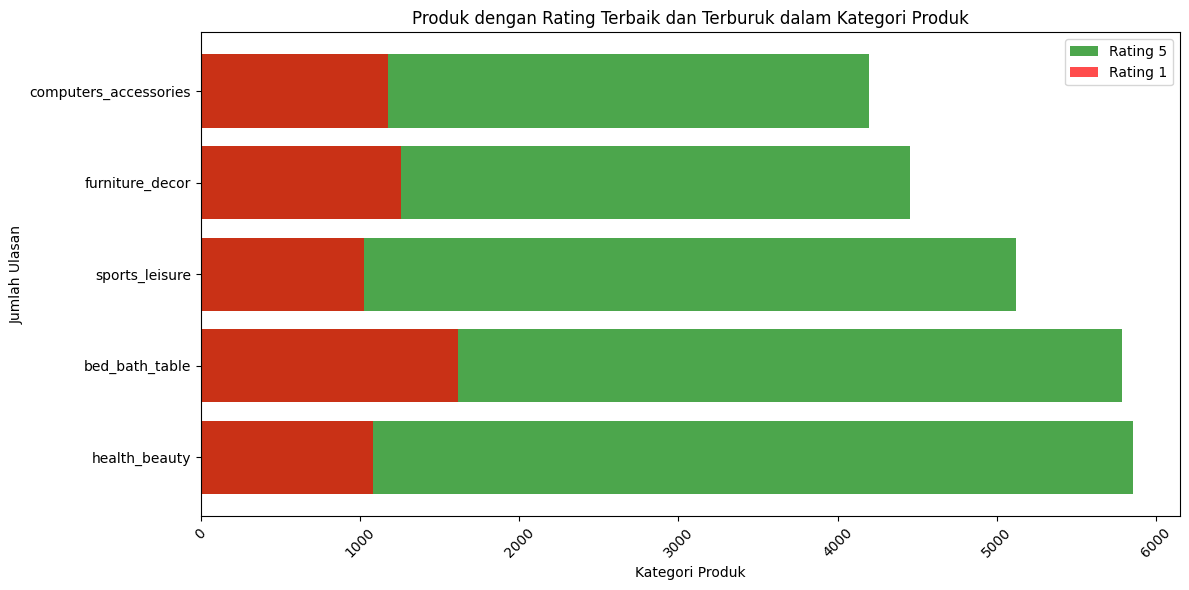

In [58]:
# Membuat plot bar untuk best_review
plt.figure(figsize=(12, 6))
plt.barh(best_review['product_category_name_english'], best_review['count'], color='green', alpha=0.7, label='Rating 5')

# Membuat plot bar untuk worst_review
plt.barh(worst_review['product_category_name_english'], worst_review['count'], color='red', alpha=0.7, label='Rating 1')

plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Ulasan')
plt.title('Produk dengan Rating Terbaik dan Terburuk dalam Kategori Produk')
plt.xticks(rotation=45)
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

### Pertanyaan 2 : Bagaimana Trend Produk yang laris dan kurang laris di E-commerce?

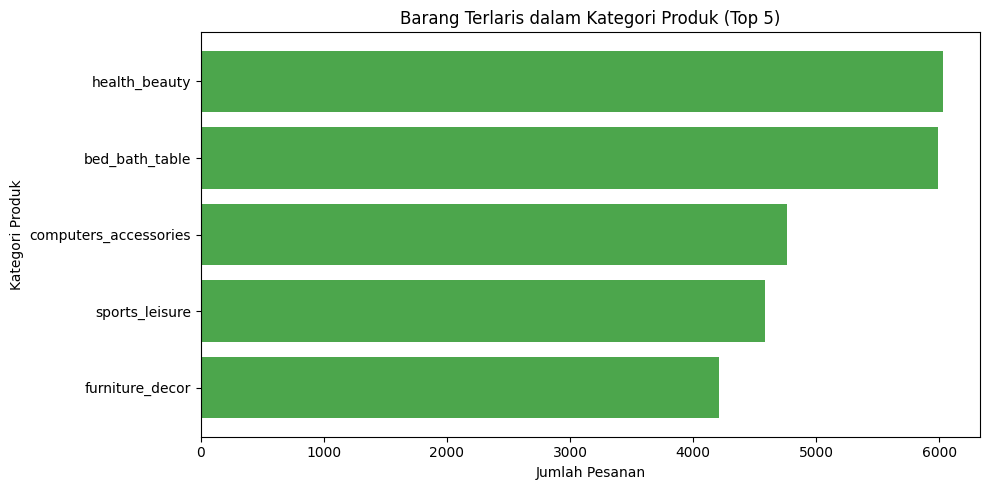

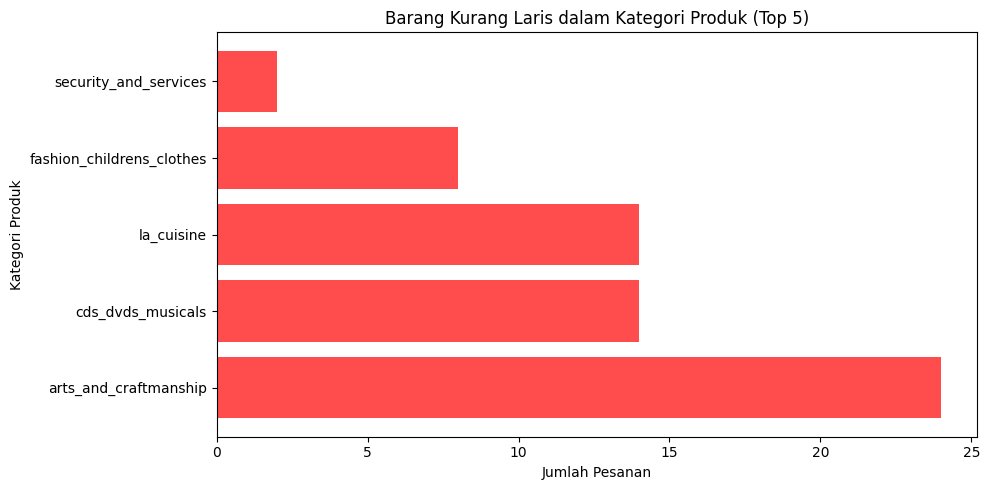

In [ ]:
# Mengambil 5 data teratas dari DataFrame most_order dan least_order dengan urutan terbalik
top_5_most_order = most_order.head(5).iloc[::-1]
top_5_least_order = least_order.head(5).iloc[::-1]

# Plot barang terlaris (most order) untuk 5 data tersebut (horizontal bar plot)
plt.figure(figsize=(10, 5))
plt.barh(top_5_most_order['product_category_name_english'], top_5_most_order['count'], color='green', alpha=0.7)
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Kategori Produk')
plt.title('Barang Terlaris dalam Kategori Produk (Top 5)')
plt.tight_layout()

# Menampilkan plot barang terlaris (Top 5) dalam bentuk horizontal bar plot
plt.show()

# Plot barang kurang laris (least order) (horizontal bar plot)
plt.figure(figsize=(10, 5))
plt.barh(top_5_least_order['product_category_name_english'], top_5_least_order['count'], color='red', alpha=0.7)
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Kategori Produk')
plt.title('Barang Kurang Laris dalam Kategori Produk (Top 5)')
plt.tight_layout()

# Menampilkan plot barang kurang laris dalam bentuk horizontal bar plot
plt.show()


 produk kategori yang paling banyak diminati pembeli pada tahun 2018?

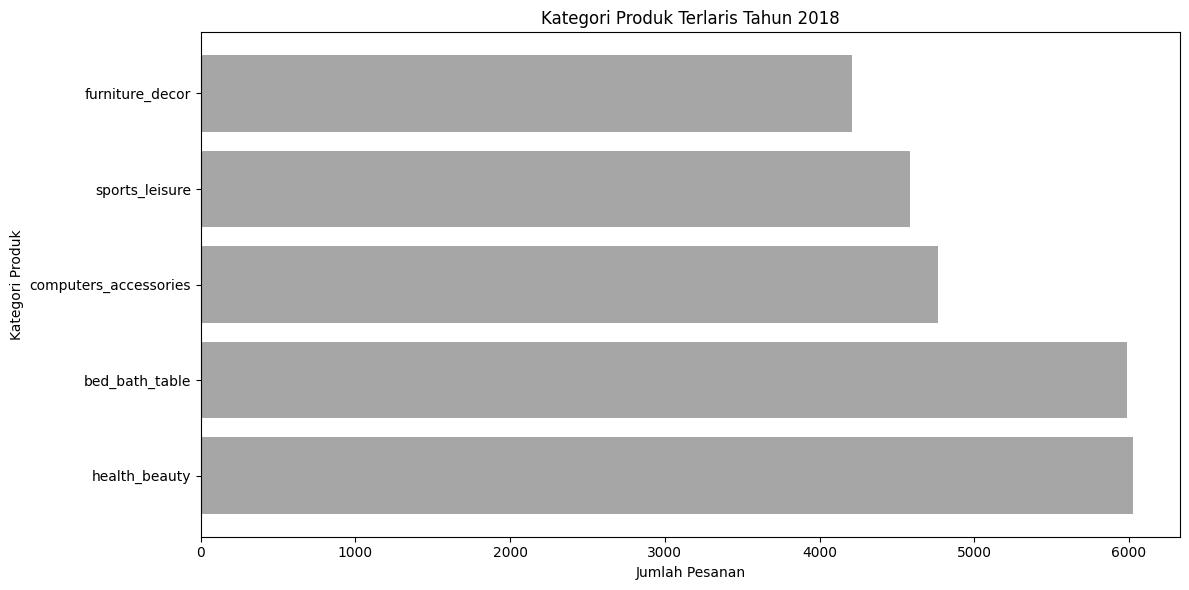

In [ ]:
# Plot kategori produk terlaris pada tahun 2018
plt.figure(figsize=(12, 6))
plt.barh(most_order['product_category_name_english'], most_order['count'], color='grey', alpha=0.7)
plt.xlabel('Jumlah Pesanan')
plt.ylabel('Kategori Produk')
plt.title('Kategori Produk Terlaris Tahun 2018')
plt.tight_layout()

# Menampilkan plot kategori produk terlaris
plt.show()

## Conclusion

###**Bagaimana Trend Review Produk? Kategori produk apa yang paling banyak mendapatkan review baik dan kurang baik dari pembeli?**
Berdasarkan hasil visualisasi data, dapat disimpulkan beberapa hal penting:

1. **Kategori dengan Review Terbaik (Rating 5.0):**
   - **Health Beauty** menjadi kategori dengan jumlah ulasan positif (rating 5.0) terbanyak, yaitu **5858 ulasan**.
   - Kategori lain yang juga memiliki jumlah review baik cukup tinggi adalah **Bed Bath Table** dan **Sports Leisure**, masing-masing dengan lebih dari 4000 ulasan positif.

2. **Kategori dengan Review Terburuk (Rating 1.0):**
   - Kategori **Bed Bath Table** menjadi kategori dengan ulasan negatif (rating 1.0) terbanyak, yaitu **1614 ulasan**.
   - Disusul oleh kategori **Furniture Decor** dan **Computers Accessories**, yang juga menunjukkan angka ulasan buruk yang cukup signifikan.

3. **Perbandingan Umum:**
   - Secara umum, semua kategori menunjukkan bahwa ulasan positif (rating 5.0) jauh lebih banyak dibandingkan ulasan negatif (rating 1.0). Hal ini menunjukkan bahwa mayoritas pembeli puas dengan produk yang mereka beli.
   - Namun, besarnya jumlah ulasan buruk pada kategori tertentu tetap menjadi sinyal untuk evaluasi kualitas atau pelayanan.

---

### **Saran / Rekomendasi**

1. **Health Beauty:**
   - Pertahankan kualitas dan fokus pada aspek pelayanan pelanggan yang mendukung loyalitas pengguna.
   - Lakukan promosi berbasis testimoni positif.

2. **Bed Bath Table:**
   - Lakukan audit terhadap produk dengan rating rendah.
   - Tingkatkan feedback loop pelanggan untuk perbaikan produk.

3. **Sports Leisure dan Furniture Decor:**
   - Amankan produk unggulan dan kaji ulang produk yang sering mendapat keluhan.

4. **Computers Accessories:**
   - Perjelas deskripsi produk dan berikan jaminan kualitas atau garansi untuk meningkatkan kepercayaan pelanggan.

---



###**Bagaimana Trend Produk yang laris dan kurang laris di E-commerce?**
####Berdasarkan hasil visualisasi data penjualan dari platform e-commerce:

- Produk **paling laris** berasal dari kategori **Bed Bath Table** dengan total **11.115** pesanan.
- Produk **paling tidak laris** berasal dari kategori **Security and Services** dengan hanya **2** pesanan.

Hal ini menunjukkan adanya ketimpangan yang signifikan dalam performa penjualan antar kategori produk di platform.

---

## Analisis Tren

### Kategori Populer:
Kategori seperti **Bed Bath Table**, **Health Beauty**, dan **Sports Leisure** menunjukkan tren pembelian tinggi, yang kemungkinan besar disebabkan oleh:

- Kebutuhan rumah tangga yang konstan.
- Tingkat kenyamanan dalam membeli produk ini secara online.
- Harga yang relatif terjangkau dan mudah dipahami tanpa perlu interaksi langsung.

### Kategori Kurang Laku:
Kategori **Security and Services** serta beberapa kategori jasa lainnya cenderung rendah peminat. Penyebab potensial:

- Produk bersifat intangible (tidak berwujud).
- Calon pembeli cenderung butuh informasi lebih lanjut atau interaksi langsung sebelum melakukan transaksi.
- Penempatan dan deskripsi produk di platform bisa jadi tidak optimal.

---

## 3. Insight Lanjutan

- Produk kebutuhan sehari-hari dan gaya hidup ringan mendominasi pembelian.
- Kategori jasa atau produk berbasis layanan mengalami kesulitan menjangkau pasar melalui platform e-commerce ini.
- Ada peluang besar untuk **cross-selling** antara kategori populer dan kategori yang kurang populer.

---

## 4. Saran dan Rekomendasi Strategis

### a. Optimalisasi Kategori Kurang Laris
- Rebranding kategori seperti *Security and Services* agar lebih mudah dipahami oleh user.
- Tambahkan **video demo, testimoni, dan garansi** pada halaman produk jasa untuk meningkatkan kepercayaan.
- Tawarkan **diskon khusus** atau paket bundling dengan produk fisik.

### b. Promosi dan Penempatan Produk
- Berikan **highlight** pada homepage atau banner khusus untuk kategori kurang laris.
- Gunakan **algoritma rekomendasi** untuk menyarankan produk kurang laris saat pengguna melihat produk yang berkaitan.

### c. Analisis Demografi & Segmentasi Pelanggan
- Lakukan segmentasi berdasarkan usia, lokasi, dan histori pembelian untuk mengetahui kategori mana yang lebih relevan untuk segmen tertentu.
- Jalankan kampanye iklan tertarget ke segmen yang cocok dengan kategori kurang laris.

### d. Kolaborasi dengan Influencer atau Partner
- Untuk produk jasa seperti *Security and Services*, kolaborasi dengan influencer lokal atau mitra bisnis bisa meningkatkan awareness dan trust.

### e. Evaluasi dan Monitoring Berkala
- Buat dashboard mingguan atau bulanan untuk memantau perkembangan kategori kurang laris setelah intervensi diterapkan.
- Gunakan A/B testing untuk melihat strategi promosi mana yang paling efektif.

---

*Dengan strategi di atas, diharapkan platform e-commerce dapat meningkatkan efisiensi penjualan dan meratakan performa antar kategori produk.*.
